In [1]:
import pandas as pd
import sys
import numpy as np
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
sns.set(style="ticks")
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster') 

C:\Users\musta\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def find_regression_params(regression_model,samples,cols):
    nyc_cab_samples=nyc_cab.samples(n=samples)
    
    Y=nyc_cab_samples['Fare_amount'].values
    X=nyc_cab_cample[cols].values
    
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
    
    regression_model.fit(X_train,Y_train)
    return np.hstack(np.array([regression_model.coef_]),np.array([regression_model.intercept_]))

In [3]:
def plot_hist_se(vals,bins,title,xlabel,ax):
    mean=vals.mean()
    std=vals.std()
    ax.hist(vals, bins=bins, color='blue', edgecolor='white', linewidth=1, alpha=0.2)
    ax.axvline(mean, color='red', label='mean = {0:.2f}'.format(mean))
    ax.axvline(mean - 2 * std, color='green', linestyle='--', label='std = {0:.2f}'.format(std))
    ax.axvline(mean + 2 * std, color='green', linestyle='--')

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.legend(loc='best')


    return ax
    

In [4]:
nyc_cab_df = pd.read_csv('nyc_car_hire_data.csv', low_memory=False)


In [5]:
nyc_cab_sample=nyc_cab_df.sample(n=1000,random_state=2)

y = nyc_cab_sample['Fare_amount'].values
X = nyc_cab_sample['Trip Length (min)'].values

X_train, X_test, y_train, y_test = train_test_split(X.reshape((len(X), 1)), y, test_size=0.33, random_state=0)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_train, y_train)

regression_line = lambda x: regression.intercept_ + regression.coef_ * x
print('The equation of the regression line is: {} + {} * x'.format(regression.intercept_, regression.coef_[0]))

The equation of the regression line is: 6.470468317419144 + 0.7164786391058208 * x


In [6]:
train_R_sq = regression.score(X_train, y_train)
test_R_sq = regression.score(X_test, y_test)
print('The train R^2 is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train R^2 is 0.43757715681817544, the test R^2 is 0.37689502630798666


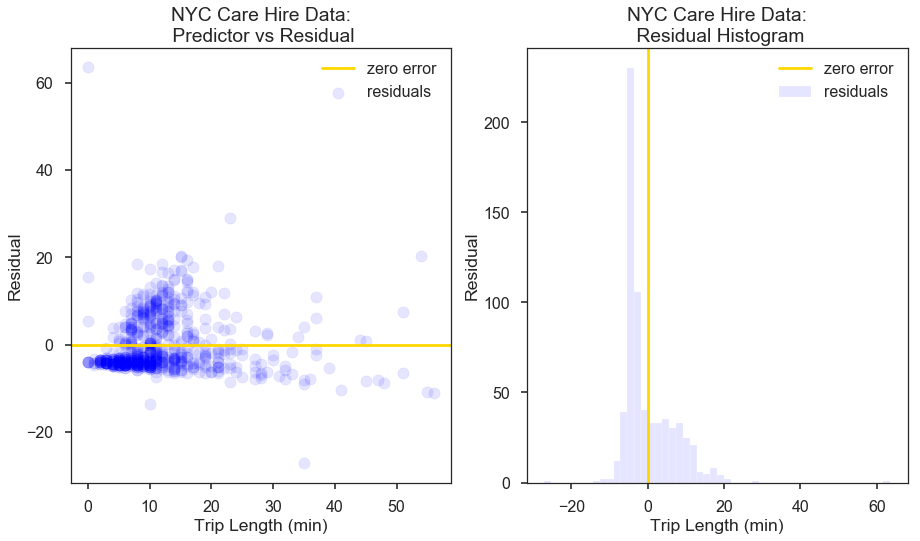

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

errors = y_train - regression.predict(X_train)
ax[0].scatter(X_train, errors, color='blue', alpha=0.1, label='residuals')
ax[0].axhline(y=0, color='gold', label='zero error')


ax[0].set_xlabel('Trip Length (min)')
ax[0].set_ylabel('Residual')
ax[0].set_title('NYC Care Hire Data:\n Predictor vs Residual')
ax[0].legend(loc='best')

ax[1].hist(errors, color='blue', alpha=0.1, label='residuals', bins=50, edgecolor='white', linewidth=2)
ax[1].axvline(x=0, color='gold', label='zero error')


ax[1].set_xlabel('Trip Length (min)')
ax[1].set_ylabel('Residual')
ax[1].set_title('NYC Care Hire Data:\n Residual Histogram')
ax[1].legend(loc='best')

## Multiple Linear Regression

In [8]:
nyc_cab_sample = nyc_cab_df.sample(n=1000, random_state=2)
nyc_cab_sample['lpep_pickup_datetime'] = nyc_cab_sample['lpep_pickup_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)
nyc_cab_sample['Lpep_dropoff_datetime'] = nyc_cab_sample['Lpep_dropoff_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)
msk = np.random.rand(len(nyc_cab_sample)) < 0.8
train = nyc_cab_sample[msk]
test = nyc_cab_sample[~msk]

y_train = train['Fare_amount'].values
X_train = train[['Trip Length (min)', 'Type', 'TMAX']].values

y_test = test['Fare_amount'].values
X_test = test[['Trip Length (min)', 'Type', 'TMAX']].values

In [9]:
multi_regression_model=LinearRegression(fit_intercept=True)

multi_regression_model.fit(X_train,y_train)

print('The equation for regression plane is:{} + {}^T . x'.format(multi_regression_model.intercept_,multi_regression_model.coef_))

The equation for regression plane is:1.4943027541575429 + [  0.78865316  10.28070913   0.01553327]^T . x


In [10]:
train_MSE= np.mean((y_train - multi_regression_model.predict(X_train))**2)
test_MSE= np.mean((y_test - multi_regression_model.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

The train MSE is 17.29061666142888, the test MSE is 38.80431055956437


In [11]:
train_R_sq = multi_regression_model.score(X_train, y_train)
test_R_sq = multi_regression_model.score(X_test, y_test)
print('The train R^2 is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train R^2 is 0.7575499895398226, the test R^2 is 0.5363240686203423


## Evaluating the significance of Predictors

In [12]:
predictors_multiple = ['Trip Length (min)', 'Type', 'TMAX']
predictors_simple = ['Trip Length (min)']

X_train_multi = add_constant(train[predictors_multiple].values)
X_test_multi = add_constant(test[predictors_multiple].values)

X_train_simple = add_constant(train[predictors_simple].values)
X_test_simple = add_constant(test[predictors_simple].values)

### 1. Measuring Significance using F-Stat and pvalues

In [13]:
multi_regression_model=sm.OLS(y_train,X_train_multi).fit()
print('F-stat:',multi_regression_model.fvalue)
print('p-values: {} (intercept), {} (Trip Length), {} (Type), {} (TMAX)'.format(*multi_regression_model.pvalues))

F-stat: 846.756190176
p-values: 0.17248807873984484 (intercept), 4.4833741097466056e-204 (Trip Length), 4.631380325854836e-152 (Type), 0.3718804786236679 (TMAX)


### 2. Measuring Significance using AIC/BIC

In [14]:
print("AIC for ['Trip Length (min)', 'Type', 'TMAX']:", multi_regression_model.aic)
print("BIC for ['Trip Length (min)', 'Type', 'TMAX']:", multi_regression_model.bic)

AIC for ['Trip Length (min)', 'Type', 'TMAX']: 4655.12952253
BIC for ['Trip Length (min)', 'Type', 'TMAX']: 4673.95207891


In [15]:
simple_regression_model = sm.OLS(y_train, X_train_simple).fit()
print("AIC for ['Trip Length (min)']:", simple_regression_model.aic)
print("BIC for ['Trip Length (min)']:", simple_regression_model.bic)


AIC for ['Trip Length (min)']: 5344.87882681
BIC for ['Trip Length (min)']: 5354.290105


### 3. Measuring Significane using R-square

In [16]:
simple_model = LinearRegression(fit_intercept=False)
simple_model.fit(X_train_simple, y_train)

print("Simple Model: train R^2 = {}, test R^2 = {}".format(simple_model.score(X_train_simple, y_train), simple_model.score(X_test_simple, y_test)))

multiple_model = LinearRegression(fit_intercept=False)
multiple_model.fit(X_train_multi, y_train)

print("Multiple Predictor Model: train R^2 = {}, test R^2 = {}".format(multiple_model.score(X_train_multi, y_train), multiple_model.score(X_test_multi, y_test)))

Simple Model: train R^2 = 0.4332388844512499, test R^2 = 0.371545701279006
Multiple Predictor Model: train R^2 = 0.7575499895398226, test R^2 = 0.5363240686203408


### 4. The effect of number of predictors on R-square

In [17]:
multi_regression_model=LinearRegression(fit_intercept=True)
cols = ['Trip Length (min)', 'Type', 'Trip_distance', 'TMAX', 'TMIN', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_longitude', 'Pickup_latitude', 'SNOW', 'SNWD', 'SNWD', 'PRCP']
train_R_sq=[]
test_R_sq=[]
for i in range(1,len(cols)+1):
    predictors=cols[:i]
    X_train=train[predictors].values
    X_test=test[predictors].values
    
    multi_regression_model.fit(X_train, y_train)
    
    train_R_sq.append(multi_regression_model.score(X_train, y_train))
    test_R_sq.append(multi_regression_model.score(X_test, y_test))

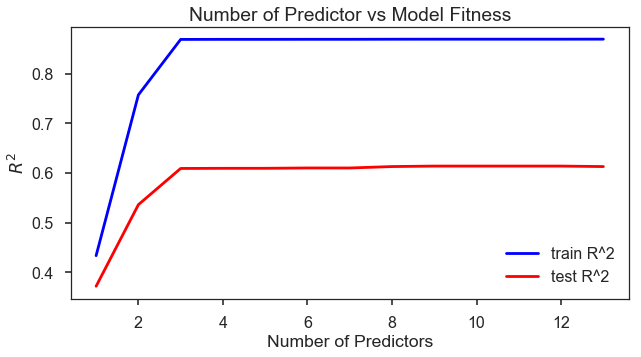

In [18]:

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(range(1, len(cols) + 1), train_R_sq, color='blue', label='train R^2')
ax.plot(range(1, len(cols) + 1), test_R_sq, color='red', label='test R^2')

ax.set_title('Number of Predictor vs Model Fitness')
ax.set_xlabel('Number of Predictors')
ax.set_ylabel('$R^2$')
ax.legend(loc='best')

plt.show()

### Multiple Linear Regression with interaction terms

In [19]:
y_train=train['Fare_amount'].values
X_train=train[['Trip Length (min)', 'Type', 'TMAX']].values

y_test = test['Fare_amount'].values
X_test = test[['Trip Length (min)', 'Type', 'TMAX']].values

gen_cross_terms=PolynomialFeatures(degree=3,interaction_only=True)
cross_terms=gen_cross_terms.fit_transform(X_train)
X_train_with_cross = np.hstack((X_train, cross_terms))
cross_terms = gen_cross_terms.fit_transform(X_test)
X_test_with_cross = np.hstack((X_test, cross_terms))

In [20]:
multi_regression_model = LinearRegression(fit_intercept=True)
multi_regression_model.fit(X_train_with_cross, y_train)

train_MSE = np.mean((y_train - multi_regression_model.predict(X_train_with_cross))**2)
test_MSE = np.mean((y_test - multi_regression_model.predict(X_test_with_cross))**2)
print('The train MSE with interaction terms is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = multi_regression_model.score(X_train_with_cross, y_train)
test_R_sq = multi_regression_model.score(X_test_with_cross, y_test)
print('The train R^2 with interaction terms is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train MSE with interaction terms is 14.646346761155604, the test MSE is 37.06805465732012
The train R^2 with interaction terms is 0.7946280925094484, the test R^2 is 0.5570707346730936


### Polynomial Regression

In [21]:
y_train = train['Fare_amount'].values
X_train = train[['Trip Length (min)', 'Type', 'TMAX']].values

y_test = test['Fare_amount'].values
X_test = test[['Trip Length (min)', 'Type', 'TMAX']].values

gen_poly_terms = PolynomialFeatures(degree=2, interaction_only=False)
X_train_with_poly = gen_poly_terms.fit_transform(X_train)
X_test_with_poly = gen_poly_terms.fit_transform(X_test)

In [22]:
poly_regression_model = LinearRegression(fit_intercept=True)
poly_regression_model.fit(X_train_with_poly, y_train)

train_MSE= np.mean((y_train - poly_regression_model.predict(X_train_with_poly))**2)
test_MSE= np.mean((y_test - poly_regression_model.predict(X_test_with_poly))**2)

print('The train MSE for degree 2 poly model is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = poly_regression_model.score(X_train_with_poly, y_train)
test_R_sq = poly_regression_model.score(X_test_with_poly, y_test)
print('The train R^2 for degree 2 poly model is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train MSE for degree 2 poly model is 14.120191995177699, the test MSE is 40.39370744233468
The train R^2 for degree 2 poly model is 0.8020058645700356, the test R^2 is 0.5173322331947596
